## To whomever that tries to understand this: I'm so so sorry.

In [1]:
import sys
sys.path += ["../utils"]
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_context({'axes.linewidth': 0.005})
sns.set_style('whitegrid')
sns.despine(left=True)
color_palette = sns.cubehelix_palette(5, start=.5, rot=-.75)
cmap = sns.cubehelix_palette(5, start=.5, rot=-.75, as_cmap=True)
sns.set_palette(color_palette)
import results_utils 

## Reproducing paper results boxplot

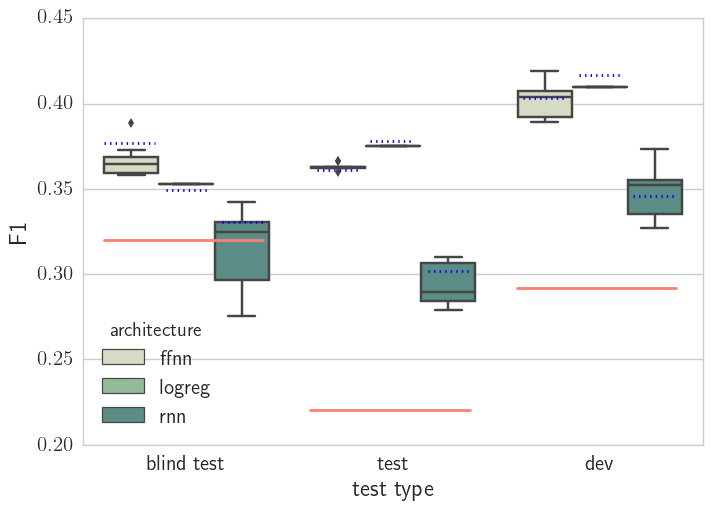

In [2]:
blind_test = results_utils.generate_matrix('blind-test')
test = results_utils.generate_matrix('test')
dev = results_utils.generate_matrix('dev')
all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})
reproduce_results = all_results[all_results['embedding type'].str.contains('reproduce')]
boxplot = sns.boxplot(data=reproduce_results, x='test type', y='F1', hue='architecture')

plt.plot([-0.4, -0.15],[0.3767, 0.3767], 'b:', lw=2)
plt.plot([-0.1, 0.1],  [0.3492, 0.3492], 'b:', lw=2)
plt.plot([0.17, 0.37], [0.3308, 0.3308], 'b:', lw=2)

plt.plot([0.63, 0.83], [0.3613, 0.3613], 'b:', lw=2)
plt.plot([0.89, 1.09], [0.3781, 0.3781], 'b:', lw=2)
plt.plot([1.17, 1.37], [0.3021, 0.3021], 'b:', lw=2)

plt.plot([1.63, 1.83], [0.4032, 0.4032], 'b:', lw=2)
plt.plot([1.90, 2.10], [0.4166, 0.4166], 'b:', lw=2)
plt.plot([2.16, 2.36], [0.3458, 0.3458], 'b:', lw=2)

# Baseline
for i,j in enumerate([[0.32, 0.32], [0.2201, 0.2201], [0.2917, 0.2917]]):
    plt.plot([-0.4 + i, 0.37 + i], j, '-', color='salmon', lw=2)

boxplot.figure.savefig('../../master-paper/figures/reproduce_boxplot_architecture.pdf')

## Results of different embeddings, boxplot

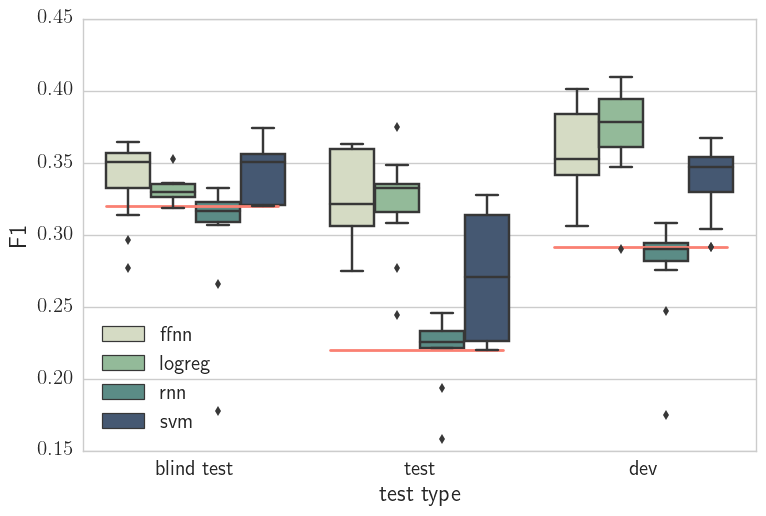

In [19]:
def filter_non_relevant(x):
    non_relevant = ['reproduce']
    for n in non_relevant:
        if n in x:
            return True
    return False
blind_test = results_utils.generate_matrix('blind-test')
blind_test = blind_test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
blind_test = blind_test.ix[[x for x in blind_test.index if not filter_non_relevant(x)]]

test = results_utils.generate_matrix('test')
test = test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
test = test.ix[[x for x in test.index if not filter_non_relevant(x)]]

dev = results_utils.generate_matrix('dev')
dev = dev[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
dev = dev.ix[[x for x in dev.index if not filter_non_relevant(x)]]

all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})
all_results.loc[all_results.architecture == 'svmrbf', 'architecture'] = 'svm'

# Baseline
for i,j in enumerate([[0.32, 0.32], [0.2201, 0.2201], [0.2917, 0.2917]]):
    plt.plot([-0.4 + i, 0.37 + i], j, '-', color='salmon', lw=2)


boxplot = sns.boxplot(data=all_results, x='test type', y='F1', hue='architecture')
plt.legend(loc='lower left')
plt.tight_layout()
boxplot.figure.savefig('../../master-paper/figures/boxplot_architectures.pdf')

In [16]:
plt.legend?

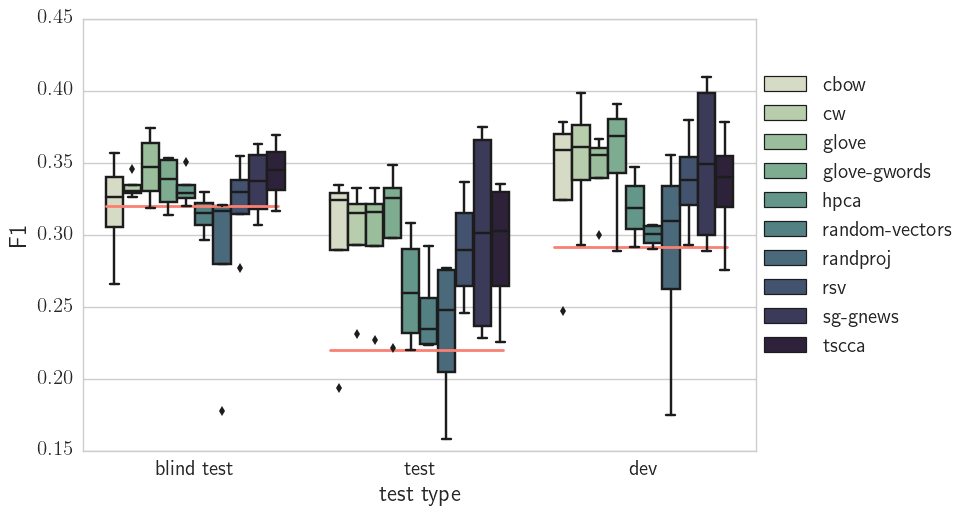

In [23]:
def cleanup_ylabel(s):
    if s.find('-wikipedia') != -1 and s.find('-wikipedia-gigawords') == -1: 
        s = s[:s.find('-wikipedia')]
    if s == 'skipgram-googlenews':
        s = 'sg-gnews'
    if s == 'glove-wikipedia-gigawords':
        s = 'glove-gwords'
    if s == 'randomprojection':
        s = 'randproj'
    if s == 'rsv50':
        s = 'rsv'
    return s

def filter_non_relevant(x):
    relevant = ['cbow-wikipedia', 'cw-wikipedia', 'glove-wikipedia', 'glove-wikipedia-gigawords', 'skipgram-googlenews', 'hpca-wikipedia', 'random-vectors', 'randproj-wikipedia', 'rsv50-wikipedia', 'tscca-wikipedia', 'randomprojection-wikipedia']
    for n in relevant:
        if n == x:
            return False
    return True
blind_test = results_utils.generate_matrix('blind-test')
blind_test = blind_test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
blind_test = blind_test.ix[[x for x in blind_test.index if not filter_non_relevant(x)]]


test = results_utils.generate_matrix('test')
test = test[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
test = test.ix[[x for x in test.index if not filter_non_relevant(x)]]

dev = results_utils.generate_matrix('dev')
dev = dev[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'])
dev = dev.ix[[x for x in dev.index if not filter_non_relevant(x)]]

all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'], level=1)
all_results = all_results.stack().reset_index().rename(columns={'level_0': 'test type', 'level_1': 'embedding type', 'level_2': 'architecture', 0: 'F1'})
all_results.loc[all_results.architecture == 'svmrbf', 'architecture'] = 'svm'

# Baseline
for i,j in enumerate([[0.32, 0.32], [0.2201, 0.2201], [0.2917, 0.2917]]):
    plt.plot([-0.4 + i, 0.37 + i], j, '-', color='salmon', lw=2)


all_results['embedding type'] = all_results['embedding type'].map(cleanup_ylabel)
all_results
with sns.cubehelix_palette(10, start=.5, rot=-.75):
    boxplot = sns.boxplot(data=all_results, x='test type', y='F1', hue='embedding type')
    lgd = plt.legend(loc=(1, 0.2))
    plt.tight_layout()
    boxplot.figure.savefig('../../master-paper/figures/boxplot_embeddings.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results confusion matrices

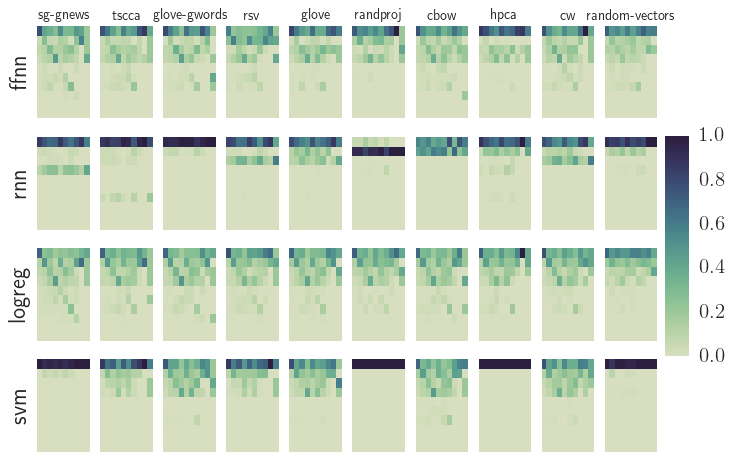

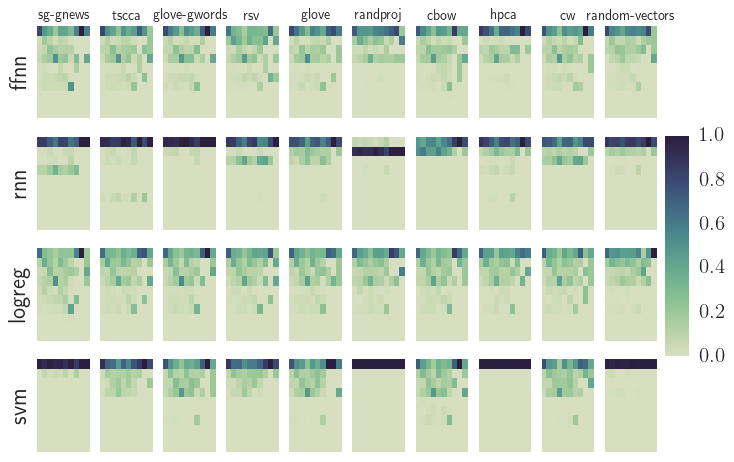

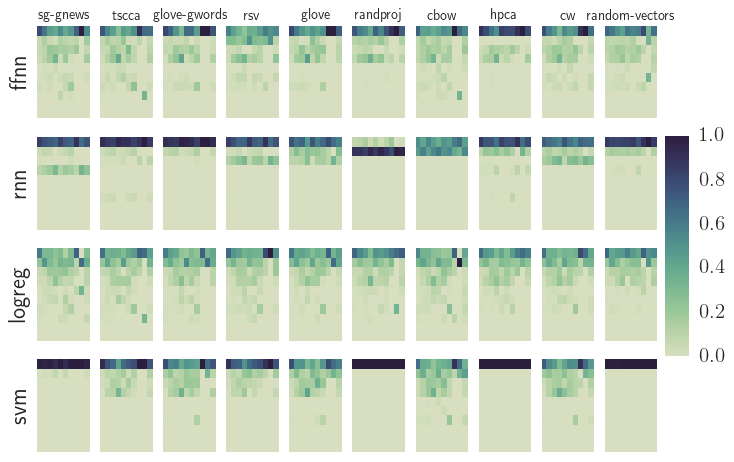

In [60]:
for test_type in ['dev', 'test', 'blind-test']:
    cm = results_utils.get_confusion_matrixes(test_type)
    legit_embeddings = ['skipgram-googlenews', 'tscca-wikipedia', 'glove-wikipedia-gigawords', 'rsv50-wikipedia', 'glove-wikipedia', 'randomprojection-wikipedia', 'cbow-wikipedia', 'hpca-wikipedia', 'cw-wikipedia', 'random-vectors']
    legit_archs = ['ffnn', 'rnn', 'logreg', 'svmrbf']
    legit_classes = ['EntRel', 'Expansion.Conjunction', 'Expansion.Restatement', 'Contingency.Cause.Reason', 'Comparison.Contrast', 'Contingency.Cause.Result', 'Expansion.Instantiation', 'Temporal.Asynchronous.Precedence', 'Temporal.Synchrony', 'Comparison.Concession']
    def get_next_cm():
        for arch in legit_archs:
            for emb in legit_embeddings:
                conf_matrix = cm[arch][emb]
                conf_matrix_norm = conf_matrix.divide(conf_matrix.sum(axis=0), axis=1)
                conf_matrix_norm = conf_matrix_norm[legit_classes].ix[legit_classes]
                if emb.find('-wikipedia') != -1 and emb.find('-wikipedia-gigawords') == -1: 
                    emb = emb[:emb.find('-wikipedia')]
                if emb == 'skipgram-googlenews':
                    emb = 'sg-gnews'
                if emb == 'glove-wikipedia-gigawords':
                    emb = 'glove-gwords'
                if emb == 'randomprojection':
                    emb = 'randproj'
                if emb == 'rsv50':
                    emb = 'rsv'
                if arch == 'svmrbf':
                    arch_name = 'svm'
                else:
                    arch_name = arch
                yield arch_name, emb, conf_matrix_norm

    fig, axn = plt.subplots(len(legit_archs), len(legit_embeddings), sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for (arch, emb, matrix), (i, ax) in zip(get_next_cm(), enumerate(axn.flat)):
        sns.heatmap(matrix, ax=ax,
                    cbar=i == 0,
                    cbar_ax=None if i else cbar_ax,
                    xticklabels=False,
                    yticklabels=False,
                    vmin=0,
                    vmax=1,
                    cmap=cmap)
        if i < len(legit_embeddings):
            ax.set_title(emb, fontsize=10)
        if i % len(legit_embeddings) == 0:
            ax.set_ylabel(arch)

    plt.savefig('../../master-paper/figures/archemb_confmatrix_{}.pdf'.format(test_type))

## Results confusion matrices, collapsed to first level

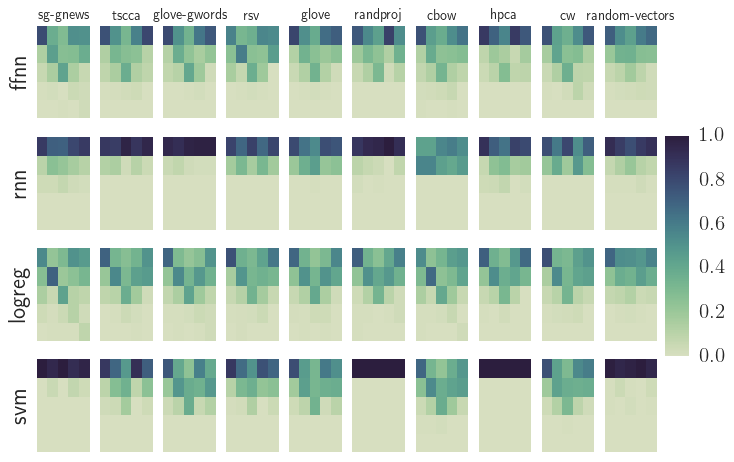

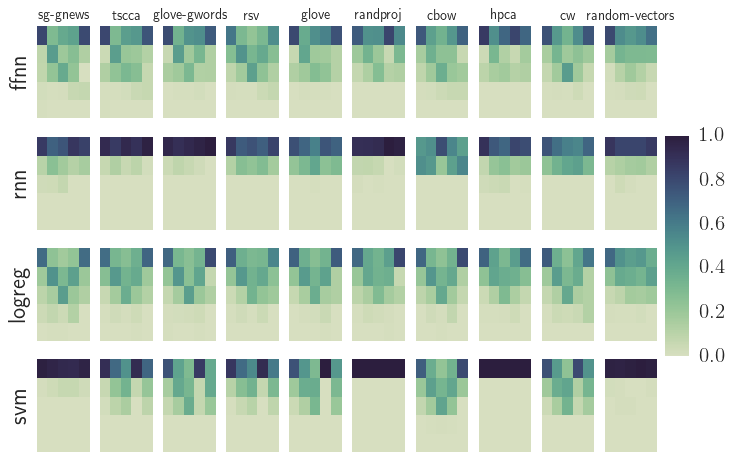

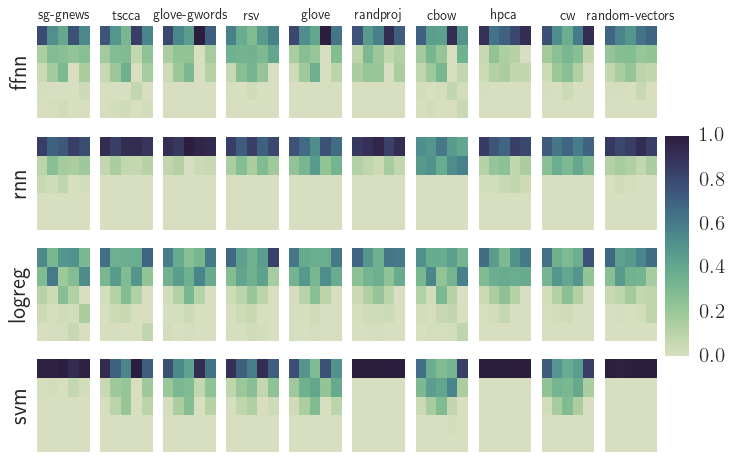

In [61]:
for test_type in ['dev', 'test', 'blind-test']:
    cm = results_utils.get_confusion_matrixes(test_type)
    legit_embeddings = ['skipgram-googlenews', 'tscca-wikipedia', 'glove-wikipedia-gigawords', 'rsv50-wikipedia', 'glove-wikipedia', 'randomprojection-wikipedia', 'cbow-wikipedia', 'hpca-wikipedia', 'cw-wikipedia', 'random-vectors']
    legit_archs = ['ffnn', 'rnn', 'logreg', 'svmrbf']
    def get_next_cm():
        for arch in legit_archs:
            for emb in legit_embeddings:
                conf_matrix = cm[arch][emb]
                conf_matrix = cm[arch][emb]
                conf_matrix.columns = conf_matrix.columns.str.split(".", expand=True)
                conf_matrix.index = conf_matrix.index.str.split(".", expand=True)
                conf_matrix = conf_matrix.groupby(axis=1, level=0).sum()
                conf_matrix = conf_matrix.groupby(level=0).sum()
                conf_matrix_norm = conf_matrix.divide(conf_matrix.sum(axis=0), axis=1)
                conf_matrix_norm = conf_matrix_norm[conf_matrix_norm.sum(axis=1).sort_values(ascending=False).index].ix[conf_matrix_norm.sum(axis=1).sort_values(ascending=False).index]
                if emb.find('-wikipedia') != -1 and emb.find('-wikipedia-gigawords') == -1: 
                    emb = emb[:emb.find('-wikipedia')]
                if emb == 'skipgram-googlenews':
                    emb = 'sg-gnews'
                if emb == 'glove-wikipedia-gigawords':
                    emb = 'glove-gwords'
                if emb == 'randomprojection':
                    emb = 'randproj'
                if emb == 'rsv50':
                    emb = 'rsv'
                if arch == 'svmrbf':
                    arch_name = 'svm'
                else:
                    arch_name = arch
                yield arch_name, emb, conf_matrix_norm

    fig, axn = plt.subplots(len(legit_archs), len(legit_embeddings), sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for (arch, emb, matrix), (i, ax) in zip(get_next_cm(), enumerate(axn.flat)):
        sns.heatmap(matrix, ax=ax,
                    cbar=i == 0,
                    cbar_ax=None if i else cbar_ax,
                    xticklabels=False,
                    yticklabels=False,
                    vmin=0,
                    vmax=1,
                    cmap=cmap)
        if i < len(legit_embeddings):
            ax.set_title(emb, fontsize=10)
        if i % len(legit_embeddings) == 0:
            ax.set_ylabel(arch)
        plt.savefig('../../master-paper/figures/archemb_collapsed_confmatrix_{}.pdf'.format(test_type))

## Create result matrices

In [32]:
import results_utils
from collections import defaultdict
def cleanup_matrix(df):
    df = df.ix[['cbow-wikipedia', 'cw-wikipedia', 'glove-wikipedia', 'hpca-wikipedia', 'random-vectors', 'randomprojection-wikipedia', 'rsv50-wikipedia', 'skipgram-googlenews', 'tscca-wikipedia', 'glove-wikipedia-gigawords']]
    df.rename({'glove-wikipedia-gigawords': 'glove-gigaword', 'rsv50-wikipedia': 'rsv'}, inplace=True)
    df.index = [x.split('-wikipedia')[0] for x in df.index]
    return df.drop(['svmlinear', 'variance', 'average', 'svmrbfc05', 'svmrbfc1024', 'baseline'], axis=1).rename(columns={'svmrbf': 'svm'})
def find_max(arch):
    def find_max_in_df(x):
        if x == clean.max()[arch]:
            y = '\\textbf{' + "{:.2f}".format(x) + '}' 
        else:
            y = "{:.2f}".format(x)
        if x == clean.max().max():
            y = '\\underline{' + y + '}'
        return y
    return find_max_in_df
res_matrices = dict()
for testtype in ['test', 'blind-test', 'dev']:
    df = results_utils.generate_matrix(testtype)
    clean = cleanup_matrix(df)
    res_matrices[testtype] = clean
    path = '../../master-paper/tables/resultsmatrix_{}.tex'.format(testtype)
    clean.to_latex(path, 
                   formatters={'ffnn': find_max('ffnn'), 
                               'logreg': find_max('logreg'), 
                               'rnn': find_max('rnn'), 
                               'svm': find_max('svm')}, 
                   escape=False)
clean

,ffnn,logreg,rnn,svm
cbow,0.3501,0.3786,0.2469,0.3677
cw,0.3691,0.3989,0.2931,0.3528
glove,0.3528,0.3664,0.2999,0.3582
hpca,0.3297,0.3474,0.3080,0.2917
random-vectors,0.3059,0.2904,0.2958,0.3066
randomprojection,0.3270,0.3555,0.1750,0.2917
rsv,0.3460,0.3799,0.2931,0.3297
skipgram-googlenews,0.3948,0.4098,0.2890,0.3039
tscca,0.3474,0.3786,0.2754,0.3338
glove-gigaword,0.3772,0.3908,0.2890,0.3609


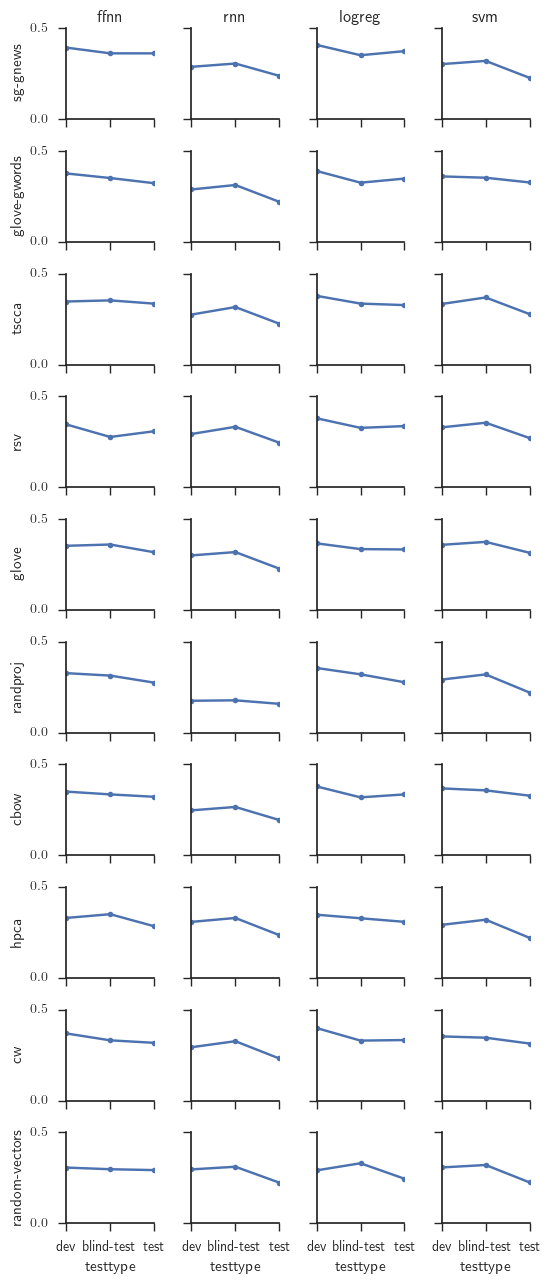

In [6]:
import numpy as np
sns.set(style="ticks")

def cleanup_ylabel(s):
    if s.find('-wikipedia') != -1 and s.find('-wikipedia-gigawords') == -1: 
        s = s[:s.find('-wikipedia')]
    if s == 'skipgram-googlenews':
        s = 'sg-gnews'
    if s == 'glove-wikipedia-gigawords':
        s = 'glove-gwords'
    if s == 'randomprojection':
        s = 'randproj'
    if s == 'rsv50':
        s = 'rsv'
    return s


test_types = ['dev', 'blind-test', 'test']
matrices = {test_type: results_utils.generate_matrix(test_type).rename(columns={'svmrbf': 'svm'}) for test_type in test_types}

legit_embeddings = ['skipgram-googlenews', 'glove-wikipedia-gigawords', 'tscca-wikipedia', 'rsv50-wikipedia', 'glove-wikipedia', 'randomprojection-wikipedia', 'cbow-wikipedia', 'hpca-wikipedia', 'cw-wikipedia', 'random-vectors']
legit_archs = ['ffnn', 'rnn', 'logreg', 'svm']

vals = []
test_type_indices = []
plot_indices = []
for i, test_type in enumerate(test_types):
    m = 0
    for j, emb in enumerate(legit_embeddings):
        for k, arch in enumerate(legit_archs):
            val = matrices[test_type][arch][emb]
            vals.append(val)
            test_type_indices.append(i)
            plot_indices.append("{} {}".format(emb, arch))
            m += 1
df=pd.DataFrame([vals, test_type_indices, plot_indices], index=['F1', 'testtype', 'plotindex']).T
df.sort_values(['plotindex', 'testtype'])


# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="plotindex", col_wrap=len(legit_archs), size=1.3)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "testtype", "F1", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(len(legit_archs)), yticks=[0, 0.5],
         xlim=(0, 2), ylim=(0, 0.5))

grid.set_titles(template="")
grid.set_xticklabels(labels=test_types)
for i, ax in enumerate(grid.axes):
    if i % len(legit_archs) == 0:
        ax.set_ylabel(cleanup_ylabel(legit_embeddings[i//len(legit_archs)]))
    if i < len(legit_archs):
        ax.set_title(legit_archs[i])
# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.savefig('../../master-paper/figures/arch_emb_line_matrix_plot.pdf')

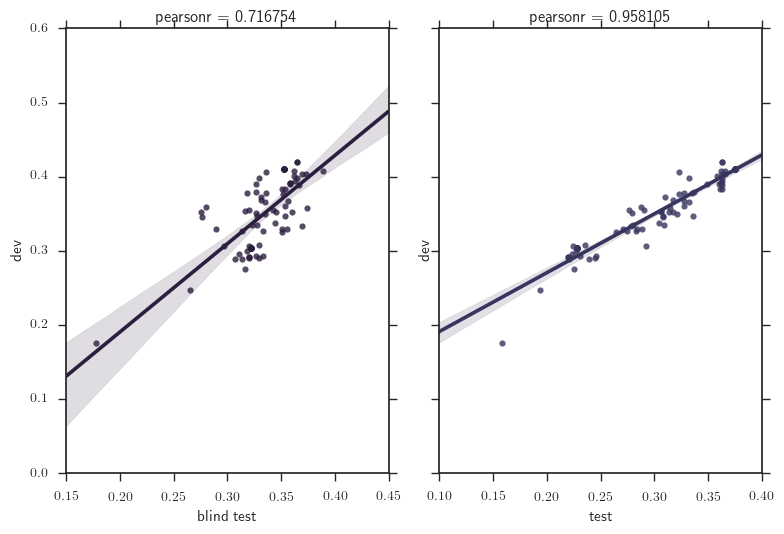

In [4]:
blind_test = results_utils.generate_matrix('blind-test')
test = results_utils.generate_matrix('test')
dev = results_utils.generate_matrix('dev')

all_results = pd.concat([blind_test, test, dev], keys=['blind test', 'test', 'dev'])[['ffnn', 'logreg', 'rnn', 'svmrbf']].drop(['average', 'variance'], level=1)
df = all_results.stack().unstack(level=0).reset_index().rename(columns={'level_0': 'embedding type', 'level_1': 'architecture'})
with sns.cubehelix_palette(10, start=0.5, rot=-.75, reverse=True):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    a = sns.regplot(data=df, x='blind test', y='dev', ax=ax1)
    b = sns.regplot(data=df, x='test', y='dev', ax=ax2)
    a.set_title("pearsonr = {:2f}".format(df.corr()['blind test']['dev']))
    b.set_title("pearsonr = {:2f}".format(df.corr()['test']['dev']))
    plt.tight_layout()
    plt.savefig('../../master-paper/figures/results_correlation_scatterplot.pdf')

In [56]:
# Run regular results matrices first

import numpy as np
from collections import defaultdict
def get_f1(cm):
    fn = 0.0
    fp = 0.0
    tp = 0.0
    for cl in cm.columns:
        fn += cm[cl].drop(cl).sum()
        fp += cm.ix[cl].drop(cl).sum()
        tp += cm[cl][cl]

    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 2 * precision * recall /(precision + recall)
    f1 = f1 if not np.isnan(f1) else 0.0
    return f1

def cleanup_matrix(df):
    df = df.ix[['cbow-wikipedia', 'cw-wikipedia', 'glove-wikipedia', 'hpca-wikipedia', 'random-vectors', 'randomprojection-wikipedia', 'rsv50-wikipedia', 'skipgram-googlenews', 'tscca-wikipedia', 'glove-wikipedia-gigawords']]
    df.rename({'glove-wikipedia-gigawords': 'glove-gigaword', 'rsv50-wikipedia': 'rsv'}, inplace=True)
    df.index = [x.split('-wikipedia')[0] for x in df.index]
    return df.rename(columns={'svmrbf': 'svm'})
def find_max(arch):
    def find_max_in_df(x):
        if x == df_diff.max()[arch]:
            y = '\\textbf{' + "{:.2f}".format(x) + '}' 
        else:
            y = "{:.2f}".format(x)
        if x == df_diff.max().max():
            y = '\\underline{' + y + '}'
        return y
    return find_max_in_df
    
    
legit_embeddings = ['skipgram-googlenews', 'tscca-wikipedia', 'glove-wikipedia-gigawords', 'rsv50-wikipedia', 'glove-wikipedia', 'randomprojection-wikipedia', 'cbow-wikipedia', 'hpca-wikipedia', 'cw-wikipedia', 'random-vectors']
legit_archs = ['ffnn', 'rnn', 'logreg', 'svmrbf']
df_dict = defaultdict(dict)
for test_type in ['dev', 'test', 'blind-test']:
    for emb in legit_embeddings:
        for arch in legit_archs:
            cm = results_utils.get_confusion_matrixes(test_type)[arch][emb]
            cm.columns = cm.columns.str.split(".", expand=True)
            cm.index = cm.index.str.split(".", expand=True)
            cm = cm.groupby(axis=1, level=0).sum()
            cm = cm.groupby(level=0).sum()
            df_dict[arch][emb] = get_f1(cm)
    df = cleanup_matrix(pd.DataFrame(df_dict))
    df_diff = df - res_matrices[test_type]
    path = '../../master-paper/tables/resultsmatrix_collapsed_{}.tex'.format(test_type)
    df_diff.to_latex(path, 
                     formatters={'ffnn': find_max('ffnn'), 
                                 'logreg': find_max('logreg'), 
                                 'rnn': find_max('rnn'), 
                                 'svm': find_max('svm')}, 
                     escape=False)
df_diff

,ffnn,logreg,rnn,svm
cbow,0.083569,0.142400,0.1344,0.0960
cw,0.067200,0.131200,0.0800,0.0784
glove,0.064000,0.117223,0.0768,0.0752
hpca,0.033600,0.081600,0.0576,0.0000
random-vectors,0.079506,0.126400,0.0448,0.0016
randomprojection,0.062400,0.083994,0.2496,0.0000
rsv,0.104000,0.106487,0.0656,0.0464
skipgram-googlenews,0.057600,0.123084,0.0336,0.0048
tscca,0.062400,0.118400,0.0480,0.0416
glove-gigaword,0.049600,0.112000,0.0368,0.0672
